<a href="https://colab.research.google.com/github/Sagnik-SB/CODSOFT/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tropikexe","key":"bc209e965324431779241355169108d9"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d yasserh/titanic-dataset
!unzip titanic-dataset.zip -d titanic_data

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 63.5MB/s]
Archive:  titanic-dataset.zip
  inflating: titanic_data/Titanic-Dataset.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_csv("titanic_data/Titanic-Dataset.csv")
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [7]:
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [8]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-1139536044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-1139536044.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [9]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

In [11]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8100558659217877


In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8268156424581006


In [15]:
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



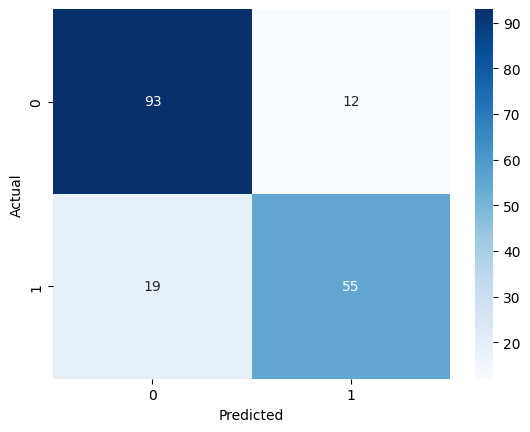

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
submission = pd.DataFrame({
    "PassengerId": df["PassengerId"],
    "Survived": rf_model.predict(X)
})
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv")

Submission file saved as submission.csv


In [18]:
importances = rf_model.feature_importances_
features = X.columns

In [19]:
feat_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

/tmp/ipython-input-573415754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="viridis")


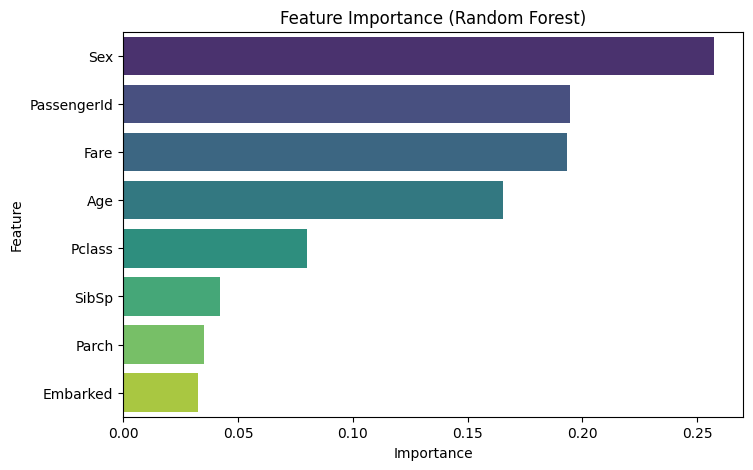


Feature Importance Ranking:
        Feature  Importance
2          Sex    0.257117
0  PassengerId    0.194417
6         Fare    0.193276
3          Age    0.165378
1       Pclass    0.079907
4        SibSp    0.041973
5        Parch    0.035313
7     Embarked    0.032619


In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

print("\nFeature Importance Ranking:\n", feat_importance)

In [22]:
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
sample_data = X_test.loc[sample_indices]
sample_true = y_test.loc[sample_indices]
sample_pred = rf_model.predict(sample_data)

# Combine into a dataframe for display
results = sample_data.copy()
results["Actual Survived"] = sample_true.values
results["Predicted Survived"] = sample_pred

print("\nSample Predictions using Random Forest:\n")
print(results)


Sample Predictions using Random Forest:

     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  \
235          236       3    0  28.0      0      0    7.5500         2   
845          846       3    1  42.0      0      0    7.5500         2   
521          522       3    1  22.0      0      0    7.8958         2   
659          660       1    1  58.0      0      2  113.2750         0   
306          307       1    0  28.0      0      0  110.8833         0   

     Actual Survived  Predicted Survived  
235                0                   1  
845                0                   0  
521                0                   0  
659                0                   1  
306                1                   1  
